In [593]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from __future__ import print_function
import torch
from torch.autograd import Variable
from IPython.display import clear_output

images = np.load('/Users/abhilash/Documents/ml_project/images.npy')
labels = np.load('/Users/abhilash/Documents/ml_project/labels.npy')
num_images,height,width = np.shape(images)
images = np.reshape(images,(num_images,height*width))
np.shape(images)
print(num_images)

images = images/255
labels = labels.astype(int)
labels[labels==0]=-1
labels[labels!=-1]=1
print(labels)

#majority_vote_label = np.argmax(np.bincount(labels))
#print(majority_vote_label)
#correct = 0
#incorrect = 0
#for i in range(0,50000):
 #   if(labels[i]==majority_vote_label):
 #       correct+=1
#print(correct/50000)

50000
[ 1 -1 -1 ...,  1  1  1]


In [594]:
#labels[labels==0]=-1

print(labels)

[ 1 -1 -1 ...,  1  1  1]


In [595]:
x_valid = images[0:5000][:]
print(np.shape(x_valid))
y_valid = labels[0:5000]
print(np.shape(y_valid))

(5000, 676)
(5000,)


In [596]:
x_train = images[0:40000][:]
print(np.shape(x_train))
y_train = labels[0:40000]
print(np.shape(y_train))

(40000, 676)
(40000,)


In [597]:
x_test = images[0:5000][:]
print(np.shape(x_test))
y_test = labels[0:5000]
print(np.shape(y_test))

(5000, 676)
(5000,)


Tossing a coin would give an accuracy of 50% while the majority vote classifier gives an accuracy of 80% 

In [630]:
print(labels)
dtype = torch.DoubleTensor
w = Variable(torch.zeros(height*width).type(dtype), requires_grad=True)
y = Variable(torch.from_numpy(labels).type(dtype),requires_grad=False)
x = Variable(torch.from_numpy(images).type(dtype),requires_grad=False)
index = 0
train_acc = np.zeros(400*5,dtype=float)
valid_acc = np.zeros(400*5,dtype=float)
for epoch in range(0,5):
    print('epoch number=',epoch+1)
    for i in range(0,40000):
        xi = x[i]
        yi = y[i]
        y_hat = torch.sign(torch.dot(w,xi))
        y_hatnp = y_hat.data.numpy()
        #print('y_hat=',y_hatnp)
        first_tensor = -yi*torch.dot(w,xi)
        second_tensor = Variable(torch.DoubleTensor([0.0]))
        Loss = torch.max(torch.cat((first_tensor, second_tensor), 0))
        #Loss = torch.clamp(first_tensor, max=0.0)
        Loss.backward()
        #print('gradient',w.grad.data)
        w.data= w.data-0.01*w.grad.data
        w.grad.data.zero_()
        #print(w.grad)
        if(i%100==0):
            train_acc[index] = accuracy(x_train,y_train,w)
            valid_acc[index] = accuracy(x_valid,y_valid,w)
            index+=1
            print(i/400,'%', end=' ', flush=False)
    clear_output()

               


In [522]:
def accuracy(xtrain,ytrain,w):
    dtype = torch.DoubleTensor
    m,n = np.shape(xtrain)
    temp = np.random.randint(m,size=(1,1000))
    correct = 0.0
    x = Variable(torch.from_numpy(xtrain).type(dtype),requires_grad=False)
    for i in range(0,1000):
        index = temp[0][i]
        xi = x[index]
        y_hat = torch.sign(torch.dot(w,xi))
        y_hatnp = y_hat.data.numpy()
        if(y_hatnp==ytrain[index]):
            correct+=1   
    return((correct/1000)*100)

average accuracy =  94.47135


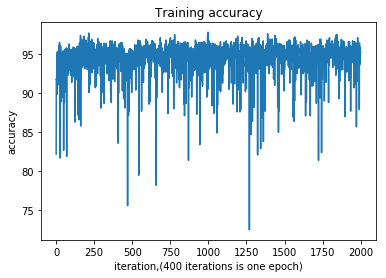

In [631]:
plt.plot(train_acc)
plt.title('Training accuracy')
plt.ylabel('accuracy')
plt.xlabel('iteration,(400 iterations is one epoch)')
print('average accuracy = ',np.mean(train_acc))

average accuracy =  94.03585


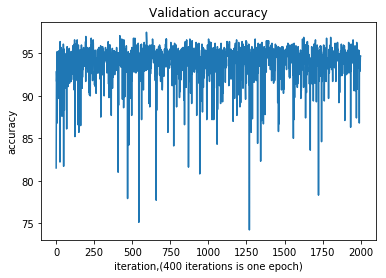

In [632]:
plt.plot(valid_acc)
plt.title('Validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('iteration,(400 iterations is one epoch)')
print('average accuracy = ',np.mean(valid_acc))

Yes, you are overfitting the data here (it tries to capture the noise in the training data)